In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Quiz 2 - Get Hyp'

<ul>
<li> Use this as a starting point for your work, but answer the questions on Moodle. 
<li> Publish this to your GitHub and submit the link in the question on Moodle. 
</ul>

## Potentially Useful Information

#### Data Dictionary
<ul>
<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>not.fully.paid: 1 if the borrower failed to repay their loan, 0 if they have not failed
</ul>

#### FICO Score Groups

![FICO](fico_range.png "FICO Ranges")

#### Note on ANOVA - Might be Useful, Might Not

> @JeremyMiles is right. First, there's a rule of thumb that the ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. Furthermore, the general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power. Since you have a significant effect anyway, there is less reason to be concerned here. 
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance

In [2]:
# Please don't alter this part. 
df = pd.read_csv("loan_data.csv")
df.drop(columns={"delinq.2yrs", "pub.rec"}, inplace=True)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0


In [20]:
fico_scores1 = pd.DataFrame(df[['not.fully.paid', 'fico']])
fico_scores1.sample(10)


,not.fully.paid,fico
2038,0,717
3028,0,687
8074,1,652
1862,0,732
5570,0,672
5782,0,682
8444,0,702
1696,1,712
8409,1,657
3417,0,722


In [21]:
fico_scores2 = pd.DataFrame(df[['credit.policy', 'fico']])
fico_scores2.sample(10)

,credit.policy,fico
4920,1,777
9499,0,692
6778,1,737
1546,1,697
8774,0,702
3413,1,682
3162,1,717
6397,1,692
8626,0,652
7975,0,657


In [22]:
fico_scores1.describe()

,not.fully.paid,fico
count,9578.000000,9578.000000
mean,0.160054,710.846314
std,0.366676,37.970537
min,0.000000,612.000000
25%,0.000000,682.000000
50%,0.000000,707.000000
75%,0.000000,737.000000
max,1.000000,827.000000


In [23]:
fico_scores2.describe()

,credit.policy,fico
count,9578.000000,9578.000000
mean,0.804970,710.846314
std,0.396245,37.970537
min,0.000000,612.000000
25%,1.000000,682.000000
50%,1.000000,707.000000
75%,1.000000,737.000000
max,1.000000,827.000000


In [28]:
a = df['credit.policy'].values.tolist()
b = df['log.annual.inc'].values.tolist()
thinkstats2.Corr(a, b), thinkstats2.SpearmanCorr(a,b)

(0.03490601145177523, 0.029397557304601335)

In [79]:
from statsmodels.stats.power import TTestPower

In [96]:
fico = pd.Series(df['fico'])
i_series = pd.Series(df['log.annual.inc'])
i_mean = np.exp(i_series)

In [97]:
fmean = fico.mean()
fcount = fico.count()
fmean, fcount

(710.8463144706619, 9578)

In [99]:
pt = TTestPower()
ces = thinkstats2.CohenEffectSize(fico, i_mean)
alpha = 0.05
nobs = fcount

n = pt.solve_power(ces, power=.85, nobs=None, alpha=alpha)
n

5.885017347639676

In [95]:
i_series = pd.Series(df['log.annual.inc'])
i_mean = np.exp(i_series)
i_mean.mean()

68402.03071015503

In [52]:
i_mean.skew()

9.59354898996782

In [54]:
c = pd.Series(df['days.with.cr.line'])
c.skew()

1.1557482270969546

In [56]:
d = pd.Series(df['fico'])
d.skew()

0.4712597399323796

In [70]:
df["grade"] = " "
scoreCol = df.columns.get_loc("fico")
gradeCol = df.columns.get_loc("grade")

for i in range(len(df)) :
    if df.iloc[i,scoreCol] < 580:
        df.iloc[i,gradeCol] = "poor"
    elif df.iloc[i,scoreCol] < 670:
        df.iloc[i,gradeCol] = "fair"
    elif df.iloc[i,scoreCol] < 740:
        df.iloc[i,gradeCol] = "good"
    elif df.iloc[i,scoreCol] < 800:
        df.iloc[i,gradeCol] = "very good"
    else:
        df.iloc[i,gradeCol] = "exceptional"
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid,grade
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,good
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,good
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,good
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,good
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0,fair
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,good
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,1,fair
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,1,good
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,good
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,good


In [76]:
tmp = df.groupby(by=['grade'])
g1 = tmp.count()
g1

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
grade,,,,,,,,,,,,
exceptional,145,145,145,145,145,145,145,145,145,145,145,145
fair,1341,1341,1341,1341,1341,1341,1341,1341,1341,1341,1341,1341
good,6007,6007,6007,6007,6007,6007,6007,6007,6007,6007,6007,6007
very good,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085


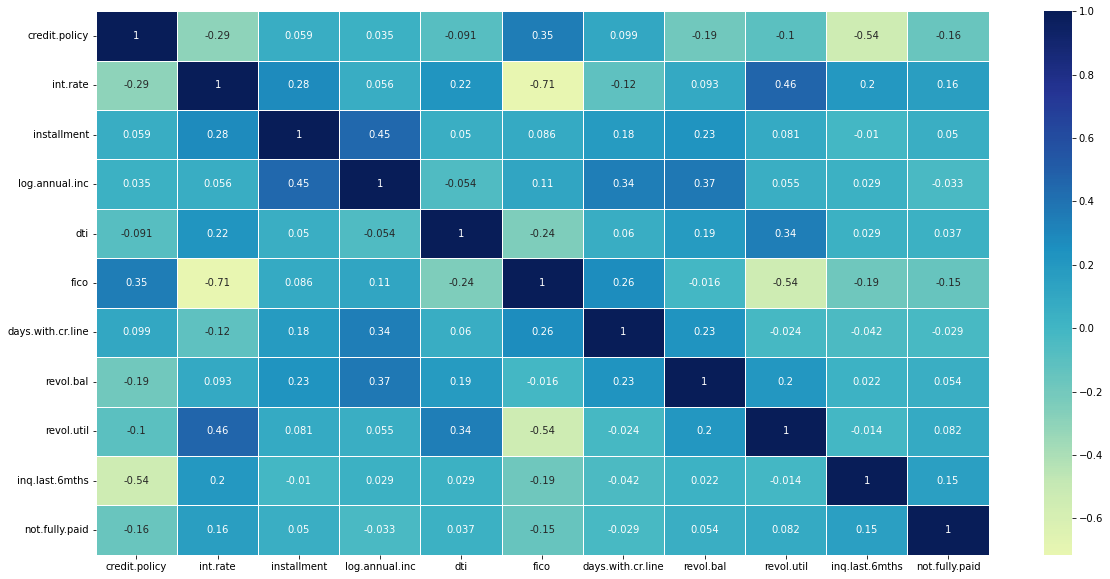

In [78]:
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True)
plt.show()

### Visualize/Explore Data - If You Want, You Do You

## Solutions